<a href="https://colab.research.google.com/github/Mithil01/AppliedAI-Assignments/blob/main/RandomSearchCVusingKfold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

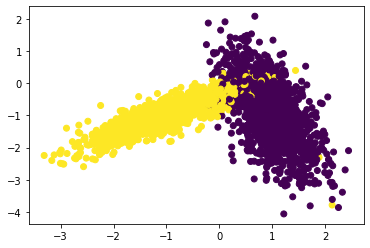

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"




</pre>

In [ ]:
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
  l,r = param_range
  global params
  params = random.sample(range(l,r),10)
  params.sort()
  #print(params)
  n = len(X_train)

  folds_len = int(n / folds)
  
  folds_x, folds_y = list(),list()

  for i in range(folds):
    folds_x.extend([X_train[i * folds_len : (i+1) * folds_len]])
    folds_y.extend([y_train[i * folds_len : (i+1) * folds_len]])
  
  #print(folds_x)
  #print(folds_y)

  tr_scores, te_scores = list(), list()

  for i in params:
    folds_trScores, folds_teScores = list(),list()
    for j in range(folds):
      x_te, y_te = folds_x[j], folds_y[j]
      trx, trxd = np.delete(folds_x, j,0), np.delete(folds_y, j,0)
      x_tr, y_tr = np.concatenate(trx), np.concatenate(trxd)

      classifier.n_neighbors = i
      classifier.fit(x_tr, y_tr)

      pred_y = classifier.predict(x_tr)
      folds_trScores.append(accuracy_score(y_tr, pred_y))

      pred_y = classifier.predict(x_te)
      folds_teScores.append(accuracy_score(y_te, pred_y))
    
    tr_scores.append(np.mean(np.array(folds_trScores)))
    te_scores.append(np.mean(np.array(folds_teScores)))
  
  return tr_scores, te_scores


[4, 10, 12, 13, 15, 21, 22, 24, 25, 28]


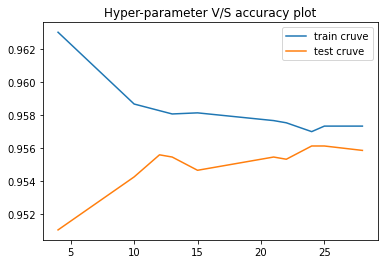

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

neigh = KNeighborsClassifier()
param_range=(1,30)
folds = 3
trainscores,testscores = RandomSearchCV(X_train,y_train,neigh, param_range, folds) # calling the function
print(params)
plt.plot(params,trainscores, label='train cruve')
plt.plot(params,testscores, label='test cruve')
plt.title('Hyper-parameter V/S accuracy plot')
plt.legend()
plt.show()

As we can see from the above plot, for k = 24, train and test accuracy is closer and moreover after it, test accuracy decreases gradually. Hence, 24 is the best value for K


In [ ]:
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

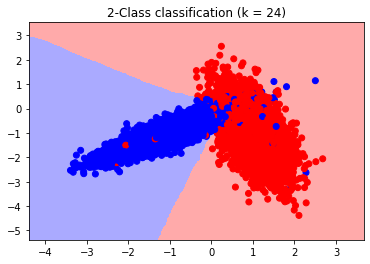

In [ ]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 24)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)